In [31]:
from get_archived_data import prepare_gridded_radar_data_from_zip, npy_to_netcdf, get_cpc_quality_code
from datetime import datetime, timedelta
import xarray as xr

In [36]:
# for a single timestep for any product
timestamp = "20210628155500"
product = "CPCH_5"
out_dir = "/users/maregger/PhD/"

grid = prepare_gridded_radar_data_from_zip(product=product, timestamp=timestamp)
#quality information for CPC_files
qc = get_cpc_quality_code(product=product, timestamp=timestamp)


ds = npy_to_netcdf(grid,product,date_dt=datetime.strptime(timestamp, "%Y%m%d%H%M%S"))
ds.to_netcdf(f'{out_dir}/{product}_{timestamp}_{qc}.nc', encoding={product:{'zlib':True,'complevel':9}})



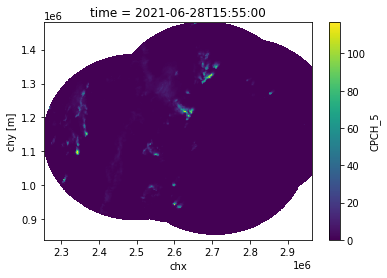

In [38]:
test_ds = xr.open_dataset(f'{out_dir}/{product}_{timestamp}_{qc}.nc')
test_ds.CPCH_5.plot()
test_ds.close()